In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv(
    "/Users/mehakpreetkaur/Desktop/PAS/ass3/data.csv",
    encoding="latin1",
    low_memory=False
)
df = df[df["no2"].notna()]
x = df["no2"].values

a_r = 0.25
b_r = 1.5

z = x + a_r * np.sin(b_r * x)
df["Z"] = z

print(df[["no2", "Z"]].head())


    no2          Z
0  17.4  17.605833
1   7.0   6.780076
2  28.5  28.264186
3  14.7  14.685296
4   7.5   7.258048


In [ ]:
import numpy as np

z = df["Z"].values

mu = np.mean(z)

var = np.var(z)

lam = 1 / (2 * var)

c = np.sqrt(lam / np.pi)

print("Estimated parameters:")
print("mu =", mu)
print("lambda =", lam)
print("c =", c)


Estimated parameters:
mu = 25.818063543032295
lambda = 0.0014617052940514906
c = 0.021570239817484047


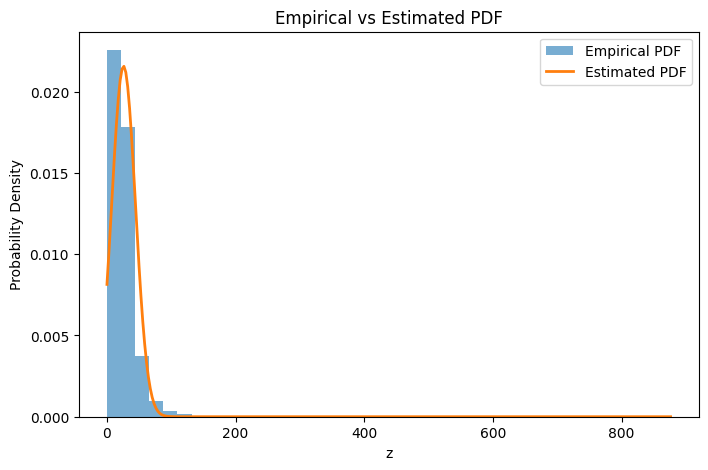

In [13]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 5))

plt.hist(z, bins=40, density=True, alpha=0.6, label="Empirical PDF")

z_range = np.linspace(z.min(), z.max(), 300)
pdf_est = c * np.exp(-lam * (z_range - mu)**2)
plt.plot(z_range, pdf_est, linewidth=2, label="Estimated PDF")

plt.xlabel("z")
plt.ylabel("Probability Density")
plt.title("Empirical vs Estimated PDF")
plt.legend()


plt.savefig("pdf_plot.png", dpi=300, bbox_inches="tight")


plt.show()


In [ ]:

log_likelihood = np.sum(
    np.log(c) - lam * (z - mu)**2
)

print("Log-likelihood =", log_likelihood)

#Higher log-likelihood ⇒ better fit
#Used to justify parameter estimation


Log-likelihood = -1819175.9018427383


In [14]:
import os
os.path.exists("pdf_plot.png")


True

In [15]:
os.path.getsize("pdf_plot.png")


86250